**Customer churn project**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


1) Load the dataset using the pandas module.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/python + ML quizzes and assignments/projects/customer churn/customer_churn.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.isna().sum().sum()

0

In [15]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df['TotalCharges'].dtype

dtype('float64')

In [18]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [19]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
df['MonthlyCharges'].dtype

dtype('float64')

### Data manipulation

1. Data Manipulation:

a. Extract the 5th column and store it in ‘customer_5’

b. Extract the 15th column and store it in ‘customer_15’

c. Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’

d. Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in 'customer_total_tenure'

e. Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

f. Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’

g. Get the count of different levels from the ‘Churn’ column

In [21]:
'''a. Extract the 5th column and store it in ‘customer_5’'''

customer_5 = df.iloc[:,4]
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [22]:
'''b. Extract the 15th column and store it in ‘customer_15’'''

customer_15 = df.iloc[:,14]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


In [23]:
customer_15 = df.loc[:,'StreamingMovies']

In [24]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [25]:
'''c. Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’'''

senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No


In [ ]:
'''d. Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in 'customer_total_tenure'''
customer_total_tenure = df[(df['tenure'] > 70)|(df['MonthlyCharges'] > 100)]
customer_total_tenure.shape

(1259, 21)

In [ ]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
'''e. Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’'''

two_mail_yes = df[(df['Contract']== 'Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
'''f. Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’'''

customer_333 = df.sample(n=333, random_state=42)

In [ ]:
'''g. Get the count of different levels from the ‘Churn’ column'''

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data Visualisation

Build a bar-plot for the ’InternetService’ column:

a. Set x-axis label to ‘Categories of Internet Service’

b. Set y-axis label to ‘Count of Categories’

c. Set the title of plot to be ‘Distribution of Internet Service’

d. Set the color of the bars to be ‘orange’



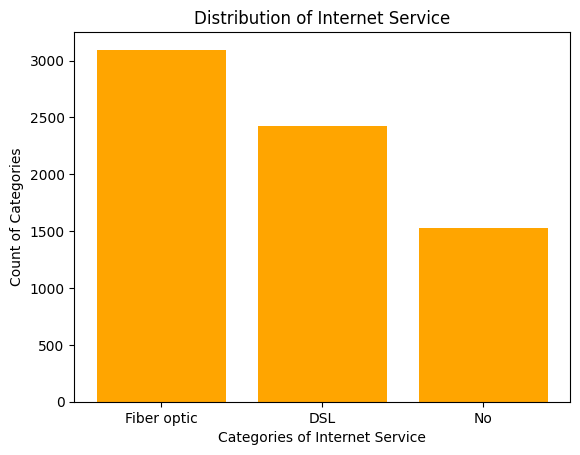

In [27]:
internet = df['InternetService'].value_counts()

plt.bar(internet.index, internet.values, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

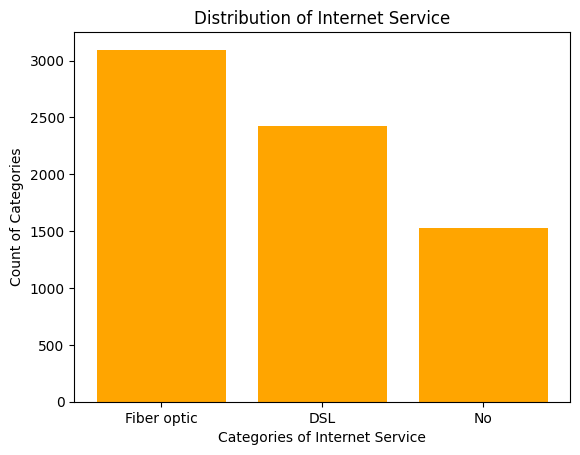

In [ ]:
internet = df['InternetService'].value_counts()
plt.bar(internet.index, internet.values, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

<Axes: xlabel='InternetService', ylabel='count'>

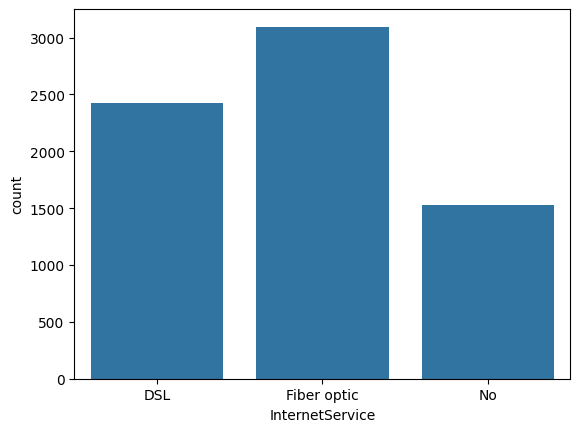

In [ ]:
import seaborn as sns
sns.countplot(x='InternetService', data=df)

● Build a histogram for the ‘tenure’ column:

a. Set the number of bins to be 30

b. Set the color of the bins to be ‘green’

c. Assign the title ‘Distribution of tenure

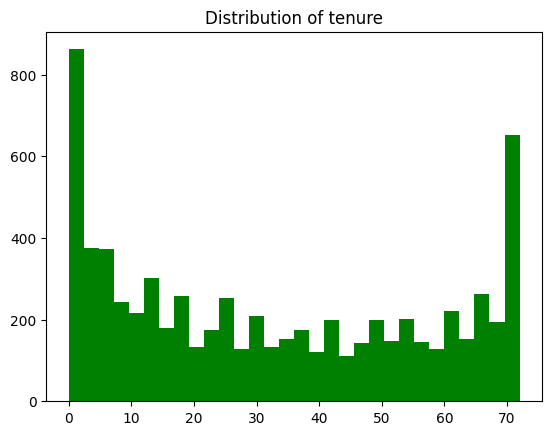

In [ ]:
plt.hist(df['tenure'], bins = 30, color = 'green')
plt.title('Distribution of tenure')
plt.show()

Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:

a. Assign the points a color of ‘brown’

b. Set the x-axis label to ‘Tenure of customer’

c. Set the y-axis label to ‘Monthly Charges of customer’

d. Set the title to ‘Tenure vs Monthly Charges’

e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &

f. ‘Contract’ on the x-axis.

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

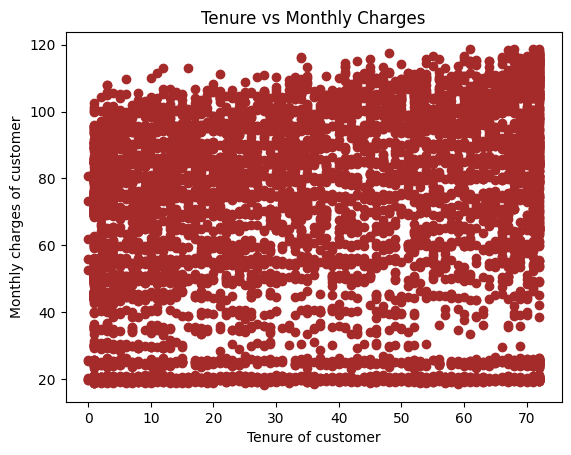

In [ ]:
plt.scatter(df['tenure'], df['MonthlyCharges'], color = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly charges of customer')
plt.title('Tenure vs Monthly Charges')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

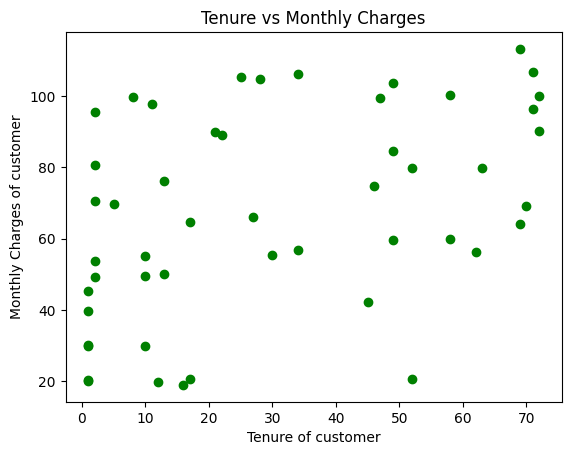

In [ ]:
plt.scatter(df['tenure'].head(50), df['MonthlyCharges'].head(50), color = 'green')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &

f. ‘Contract’ on the x-axis.

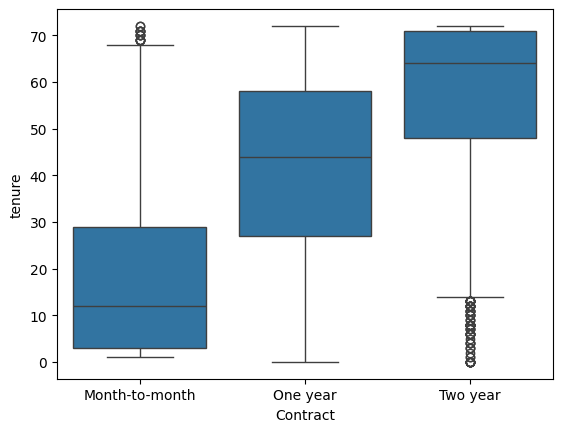

In [ ]:
sns.boxplot(x = 'Contract', y = 'tenure', data = df)
plt.show()

### Linear Regression

● Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:

a. Divide the dataset into train and test sets in 70:30 ratio.

b. Build the model on train set and predict the values on test set

c. After predicting the values, find the root mean square error

d. Find out the error in prediction & store the result in ‘error’

e. Find the root mean square error

In [28]:
from re import X
x = df[['tenure']]
y = df[['MonthlyCharges']]
x

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [29]:
y

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [30]:
'''a. Divide the dataset into train and test sets in 70:30 ratio.'''
from sklearn.model_selection import train_test_split


In [31]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=80)

In [32]:
'''b. Build the model on train set and predict the values on test set.'''
from sklearn.linear_model import LinearRegression




In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train ,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)
y_pred

array([[65.5433103 ],
       [67.07328138],
       [58.81143757],
       ...,
       [55.44550121],
       [71.35720039],
       [72.27518303]])

In [36]:
'''c. After predicting the values, find the root mean square error'''

from sklearn.metrics import r2_score, mean_squared_error

In [37]:
print("r2_score:", r2_score(y_test, y_pred)*100,'%')

r2_score: 6.112755708771056 %


839.242732622821

In [38]:
'''d. Find out the error in prediction & store the result in ‘error'''


'd. Find out the error in prediction & store the result in ‘error'

In [39]:
'''e. Find the root mean square error'''
mean_squared_error(y_test, y_pred)

839.242732622821

Logistic Regression:
● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:

a. Divide the dataset in 65:35 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and get the accuracy score

d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’

e. Divide the dataset in 80:20 ratio

f. Build the model on train set and predict the values on test set

g. Build the confusion matrix and get the accuracy score

In [40]:
'''a. Divide the dataset in 65:35 ratio'''
x = df[['MonthlyCharges']]
y = df[['Churn']]

In [41]:
x

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [42]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, random_state=80)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model1 = LogisticRegression()

In [46]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
pred1 = model1.predict(x_test)
pred1

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [48]:
'''c. Build the confusion matrix and get the accuracy score'''

from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
print("Accuracy score",accuracy_score(y_test, pred1),"%")

Accuracy score 0.7319545823195458 %


In [50]:
confusion_matrix(y_test,pred1)

array([[1805,    0],
       [ 661,    0]])

In [ ]:
'''d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’'''



In [51]:

x = df[['MonthlyCharges', 'tenure']]
y = df[['Churn']]

In [52]:
'''e.Divide the dataset in 80:20 ratio'''

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, random_state=80)

In [53]:
'''f. Build the model on train set and predict the values on test set '''

model2= LogisticRegression()

In [54]:
model2.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
x_train

,MonthlyCharges,tenure
5117,61.35,66
6939,89.20,35
5144,30.75,3
3907,89.95,19
4029,45.05,56
...,...,...
522,85.50,55
2259,20.85,8
2982,20.85,52
5308,82.45,69


In [56]:
pred2 = model2.predict(x_test)
pred2

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
'''g. Build the confusion matrix and get the accuracy score'''

In [57]:
print("accuracy score is:",accuracy_score(y_test, pred2)*100, "%")

accuracy score is: 78.30494728304947 %


In [58]:
cm=confusion_matrix(y_test, pred2)
cm

array([[1631,  174],
       [ 361,  300]])

In [62]:
print("accuracy score for Logistic Regression Model is:",accuracy_score(y_test, pred2)*100,"%")

accuracy score for Logistic Regression Model is: 78.30494728304947 %


Decision Tree:
● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:

a. Divide the dataset in 80:20 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy


In [63]:
'''a. Divide the dataset in 80:20 ratio'''

x = df[['tenure']]
y = df[['Churn']]

In [64]:
x

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [65]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [66]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
'''b. Build the model on train set and predict the values on test set'''

'b. Build the model on train set and predict the values on test set'

In [67]:
from sklearn import tree
tree.DecisionTreeRegressor


sklearn.tree._classes.DecisionTreeRegressor

In [68]:
clf = tree.DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [69]:
'''c. Build the confusion matrix and calculate the accuracy'''

cm=confusion_matrix(y_test, y_test_pred)
cm

array([[951,  85],
       [257, 116]])

In [70]:
print("accuracy score of Decision Tree is:",accuracy_score(y_test, y_test_pred)*100,"%")

accuracy score of Decision Tree is: 75.72746628814762 %


6. Random Forest:
● Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:

a. Divide the dataset in 70:30 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy


In [71]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [72]:
'''a. Divide the dataset in 70:30 ratio'''
x = df[['tenure','MonthlyCharges']]
y = df[['Churn']]

In [73]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [74]:
'''b. Build the model on train set and predict the values on test set'''
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [75]:
rf = RandomForestClassifier(random_state=45)
rf = rf.fit(x_train, y_train)
y_train_pred= rf.predict(x_train)
y_test_pred= rf.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [76]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [77]:
'''c. Build the confusion matrix and calculate accuracy'''
from sklearn.metrics import accuracy_score, confusion_matrix

print("accuracy score is:",accuracy_score(y_test, y_test_pred)*100,"%")

accuracy score is: 75.34311405584478 %


In [78]:
cm= confusion_matrix(y_test, y_test_pred)
cm

array([[1325,  214],
       [ 307,  267]])